# Exploratory Data Analysis

- Database contains top 10 videos in 5 regions (India, USA, Brazil, Indonesia and Mexico) for 19 days
- date time in UTC 

In [10]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('data_for_eda.csv')

df.head()

,id,region_code,publish_date,channel_id,channel_name,title,description,category_id,duration,caption,views,likes,comment_count
0,XhW3i2f54BQ,IN,2025-02-24T05:37:32Z,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,16695651,323858,6688
1,W8x6Dwyj0-A,IN,2025-02-22T11:30:08Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,25780803,1588648,115750
2,dbWfo4NAx8M,IN,2025-02-23T17:12:10Z,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,2064436,83781,5386
3,DQnZhK6Y27g,IN,2025-02-23T06:11:52Z,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | इ...,Probo Link: https://probo-in.onelink.me/1kre/C...,28,PT29M42S,False,4442627,300654,47471
4,UTaWdNZkGcM,IN,2025-02-23T17:21:39Z,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India की Pakistan पर Virat जीत ! R...,#indvspak #viratkohli #shreyasiyer #shubmangil...,17,PT11M48S,False,1374247,59617,3526


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             950 non-null    object
 1   region_code    950 non-null    object
 2   publish_date   950 non-null    object
 3   channel_id     950 non-null    object
 4   channel_name   950 non-null    object
 5   title          950 non-null    object
 6   description    913 non-null    object
 7   category_id    950 non-null    int64 
 8   duration       950 non-null    object
 9   caption        950 non-null    bool  
 10  views          950 non-null    int64 
 11  likes          950 non-null    int64 
 12  comment_count  950 non-null    int64 
dtypes: bool(1), int64(4), object(8)
memory usage: 90.1+ KB


In [13]:
df.describe()

,category_id,views,likes,comment_count
count,950.000000,9.500000e+02,9.500000e+02,950.000000
mean,18.202105,2.704346e+06,1.145956e+05,7517.758947
std,6.201668,5.162960e+06,2.340555e+05,16819.392253
min,1.000000,2.012500e+04,0.000000e+00,0.000000
25%,17.000000,3.760585e+05,1.199950e+04,740.250000
50%,20.000000,8.976115e+05,3.454600e+04,2126.500000
75%,24.000000,2.628984e+06,1.069440e+05,6154.000000
max,28.000000,4.278778e+07,2.328540e+06,153045.000000


In [14]:
df.nunique()

id               694
region_code        5
publish_date     688
channel_id       518
channel_name     517
title            695
description      645
category_id       14
duration         561
caption            2
views            898
likes            908
comment_count    836
dtype: int64

- out of 950 videos, 694 are unique

## Feature Engineering

In [15]:
df = df.rename(columns={'publish_date' : 'publish_date_time'})

df.head(5)

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,views,likes,comment_count
0,XhW3i2f54BQ,IN,2025-02-24T05:37:32Z,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,16695651,323858,6688
1,W8x6Dwyj0-A,IN,2025-02-22T11:30:08Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,25780803,1588648,115750
2,dbWfo4NAx8M,IN,2025-02-23T17:12:10Z,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,2064436,83781,5386
3,DQnZhK6Y27g,IN,2025-02-23T06:11:52Z,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | इ...,Probo Link: https://probo-in.onelink.me/1kre/C...,28,PT29M42S,False,4442627,300654,47471
4,UTaWdNZkGcM,IN,2025-02-23T17:21:39Z,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India की Pakistan पर Virat जीत ! R...,#indvspak #viratkohli #shreyasiyer #shubmangil...,17,PT11M48S,False,1374247,59617,3526


In [16]:
# splitting date and time into two columns
df[['publish_date', 'publish_time']] = df['publish_date_time'].str.split('T', expand=True)
df['publish_time'] = df['publish_time'].str.rstrip('Z')


In [17]:
# convert to appropriate data types
df['publish_date_time'] = pd.to_datetime(df['publish_date_time'], utc=True, errors='coerce') 

df['duration_in_min'] = pd.to_timedelta(df['duration'], errors='coerce').dt.total_seconds() #duration in minutes
df['duration_in_min'] = (df['duration_in_min']/60.00).round(2) #duration in minutes

df.dtypes

id                                object
region_code                       object
publish_date_time    datetime64[ns, UTC]
channel_id                        object
channel_name                      object
title                             object
description                       object
category_id                        int64
duration                          object
caption                             bool
views                              int64
likes                              int64
comment_count                      int64
publish_date                      object
publish_time                      object
duration_in_min                  float64
dtype: object

In [18]:
# adding some useful columns 
df['views_per_minute'] = (df.views/df.duration_in_min).round(2)
df['likes_per_minute'] = (df.likes/df.duration_in_min).round(2)

df['likes_per_view'] = (df.likes/df.views).round(2)
df['comments_per_view'] = (df.comment_count/df.views).round(2)
df.head(3)

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,views,likes,comment_count,publish_date,publish_time,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,16695651,323858,6688,2025-02-24,05:37:32,1.75,9540372.00,185061.71,0.02,0.0
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,25780803,1588648,115750,2025-02-22,11:30:08,2.97,8680405.05,534898.32,0.06,0.0
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,2064436,83781,5386,2025-02-23,17:12:10,3.88,532071.13,21593.04,0.04,0.0


In [19]:
""""Getting categories for all regions using Youtube Data API"""

# from mypackage import get_youtube_object

# youtube = get_youtube_object()

# categories = {}
# for region in ['IN', 'US', 'BR', 'ID', 'MX']:
#     request = youtube.videoCategories().list(
#             part="snippet",
#             regionCode='IN'
#         )
#     response = request.execute()
#     tmp_dict = {}
#     for i in range(len(response['items'])):
#         tmp_dict[response['items'][i]['id']] = response['items'][i]['snippet']['title']
#     categories[region] = tmp_dict

# print(categories)


'"Getting categories for all regions using Youtube Data API'

In [20]:
# categories = {'IN': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'US': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'BR': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'ID': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}, 
#               'MX': {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}}

- since there is no difference between categories of these 5 regions we can simply use one dict

In [21]:
categories = {'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}

In [22]:
df['category'] = df['category_id'].apply(lambda x: categories[str(x)] if str(x) in categories.keys() else 'NaN')

df.head()

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,...,likes,comment_count,publish_date,publish_time,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,...,323858,6688,2025-02-24,05:37:32,1.75,9540372.00,185061.71,0.02,0.00,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,...,1588648,115750,2025-02-22,11:30:08,2.97,8680405.05,534898.32,0.06,0.00,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,...,83781,5386,2025-02-23,17:12:10,3.88,532071.13,21593.04,0.04,0.00,Sports
3,DQnZhK6Y27g,IN,2025-02-23 06:11:52+00:00,UCebC4x5l2-PQxg46Ucv9CsA,Crazy XYZ,Crazy Secret Room Making Challenges Part-3 | इ...,Probo Link: https://probo-in.onelink.me/1kre/C...,28,PT29M42S,False,...,300654,47471,2025-02-23,06:11:52,29.70,149583.40,10123.03,0.07,0.01,Science & Technology
4,UTaWdNZkGcM,IN,2025-02-23 17:21:39+00:00,UC9D7QzaNDP11e4jI4ygU5Xg,NewsBook,IND vs PAK: India की Pakistan पर Virat जीत ! R...,#indvspak #viratkohli #shreyasiyer #shubmangil...,17,PT11M48S,False,...,59617,3526,2025-02-23,17:21:39,11.80,116461.61,5052.29,0.04,0.00,Sports


In [23]:
# checking for missing categories
df[df['category'] == 'Nan']

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,...,likes,comment_count,publish_date,publish_time,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view,category


## EDA

In [24]:
df.head(3)

,id,region_code,publish_date_time,channel_id,channel_name,title,description,category_id,duration,caption,...,likes,comment_count,publish_date,publish_time,duration_in_min,views_per_minute,likes_per_minute,likes_per_view,comments_per_view,category
0,XhW3i2f54BQ,IN,2025-02-24 05:37:32+00:00,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,1,PT1M45S,True,...,323858,6688,2025-02-24,05:37:32,1.75,9540372.00,185061.71,0.02,0.0,Film & Animation
1,W8x6Dwyj0-A,IN,2025-02-22 11:30:08+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,MANIAC (Official Video): YO YO HONEY SINGH | E...,YOU CAN FEEL THE HEAT! PRESENTING THE OFFICIAL...,10,PT2M58S,False,...,1588648,115750,2025-02-22,11:30:08,2.97,8680405.05,534898.32,0.06,0.0,Music
2,dbWfo4NAx8M,IN,2025-02-23 17:12:10+00:00,UCeWqACGRU5gT0BXeFhrixWA,Shoaib Akhtar,I am Not Disappointed at All | #PAKVIND | Shoa...,I am Not Disappointed at All | #PAKVIND\n\n#Sh...,17,PT3M53S,False,...,83781,5386,2025-02-23,17:12:10,3.88,532071.13,21593.04,0.04,0.0,Sports


In [25]:
df.dtypes

id                                object
region_code                       object
publish_date_time    datetime64[ns, UTC]
channel_id                        object
channel_name                      object
title                             object
description                       object
category_id                        int64
duration                          object
caption                             bool
views                              int64
likes                              int64
comment_count                      int64
publish_date                      object
publish_time                      object
duration_in_min                  float64
views_per_minute                 float64
likes_per_minute                 float64
likes_per_view                   float64
comments_per_view                float64
category                          object
dtype: object

In [26]:
# prolly shd make a publish_time, publish_date interval

### Univariate Analysis

#### Categorical Columns

In [27]:
categorical = ['channel_id', 'category', 'caption']
numerical = ['publish_date_time', 'duration_in_min', 'views', 'likes', 'comment_count']

In [28]:
def categorical_univariate(col):
    if df[col].nunique() < 50: # make plot only if unique values dont go beyond 50
        print(col)
        sns.countplot(data=df, x=col)
        if df[col].nunique() > 5:
            plt.xticks(rotation = 90) # rotate labels for easier readibility
        plt.show()
    print(df[col].value_counts())
    print('-------------------------------------' + '\n')


channel_id
UCN9_L9lA9kqJbGANLRus_1A    15
UC_oToDrJ6uca7d1dFVBmLtg    14
UC3IZKseVpdzPSBaWxBxundA    14
UCB_qr75-ydFVKSF9Dmo6izg    11
UCYnMzKK6hcpnlRCxGnPwk6Q    11
                            ..
UCUpZKAvgQbvHyXAerkmxhSQ     1
UCEP5aLKvW6TUaP-u20j4yFg     1
UCzHQ5_q5zgryHr1ZsTi8STQ     1
UCSbEeTlKPcfwAlqwJ08rZaw     1
UC9D7QzaNDP11e4jI4ygU5Xg     1
Name: count, Length: 518, dtype: int64
-------------------------------------

category


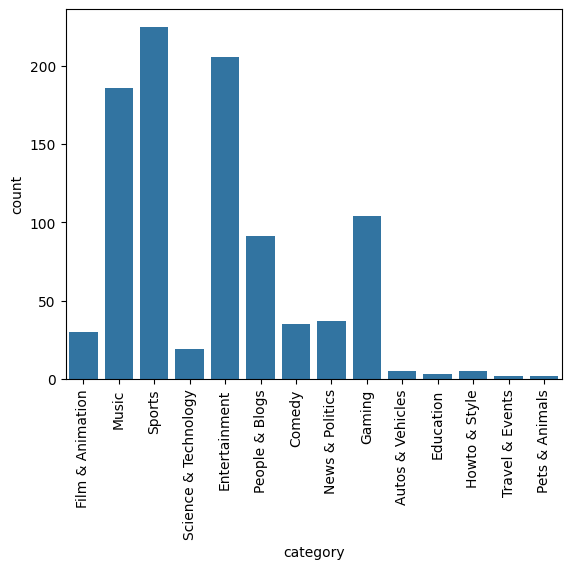

category
Sports                  225
Entertainment           206
Music                   186
Gaming                  104
People & Blogs           91
News & Politics          37
Comedy                   35
Film & Animation         30
Science & Technology     19
Autos & Vehicles          5
Howto & Style             5
Education                 3
Travel & Events           2
Pets & Animals            2
Name: count, dtype: int64
-------------------------------------

caption


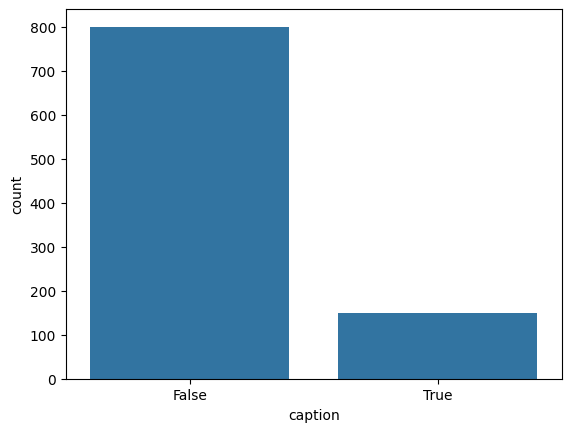

caption
False    800
True     150
Name: count, dtype: int64
-------------------------------------



In [29]:
for col in categorical:
    categorical_univariate(col)

#### Numerical Columns

In [30]:
def numerical_univariate(col):
    print(col)
    sns.displot(data=df, x=col, kde=True)
    plt.xticks(rotation=90)
    plt.show()
    sns.boxplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.show()
    print('----------------------------------- \n')

publish_date_time


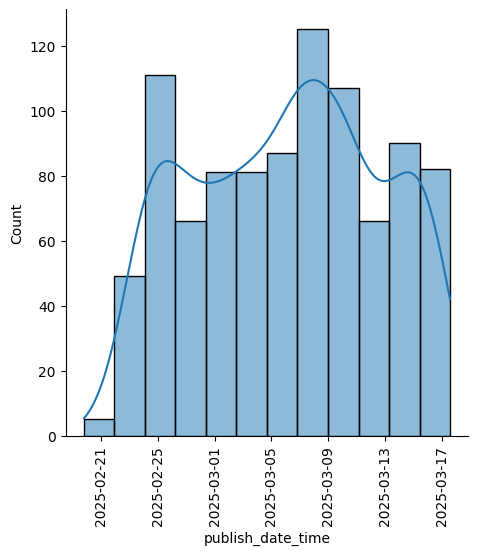

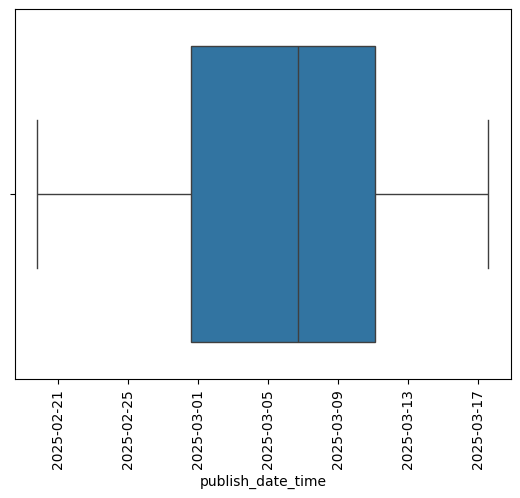

----------------------------------- 

duration_in_min


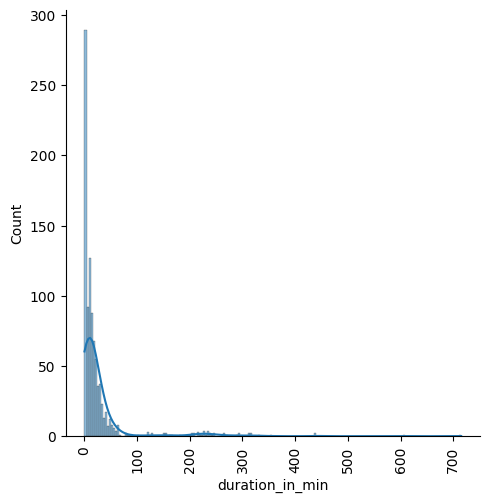

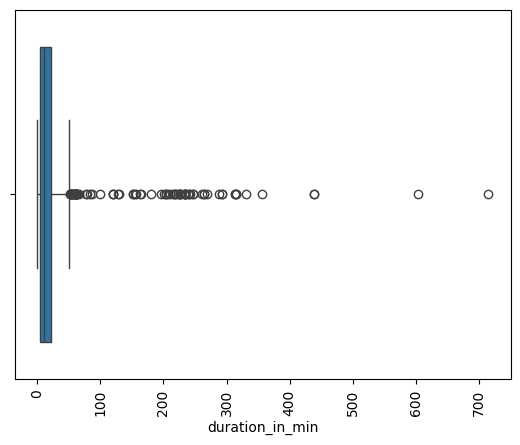

----------------------------------- 

views


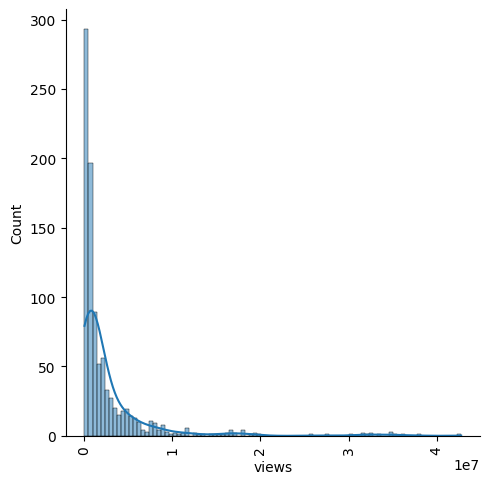

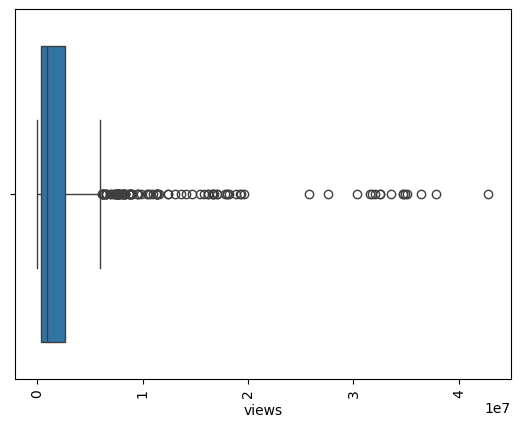

----------------------------------- 

likes


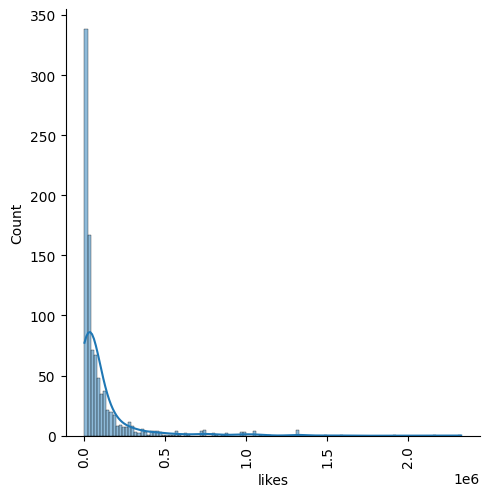

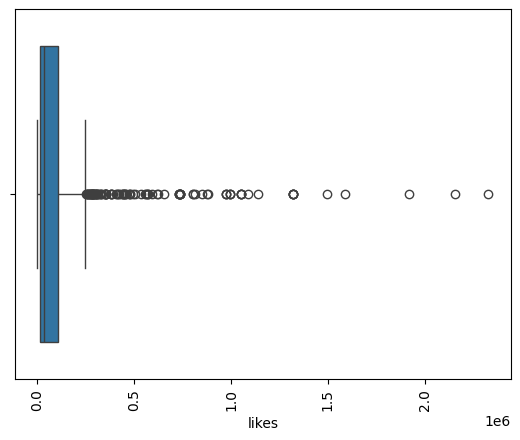

----------------------------------- 

comment_count


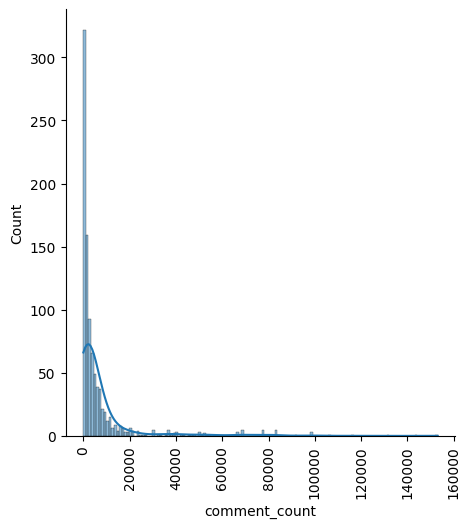

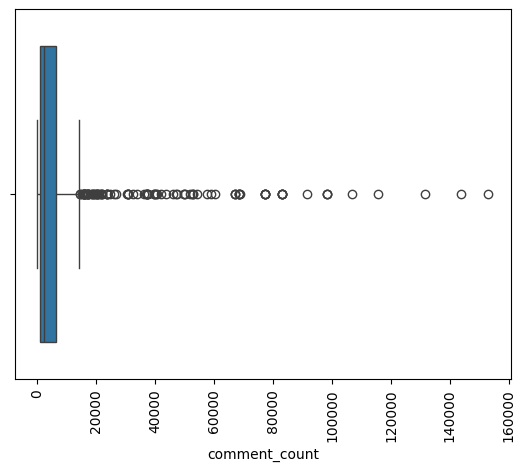

----------------------------------- 



In [31]:
for col in numerical:
    numerical_univariate(col)

### Bivariate Analysis